### plot periodic orbits and iterations for a map like the logistic map
### or plot the lyapunov exponent for the map


In [6]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Here is our map f(x)
def ourmap(x,r):
        y = r - x*x
        return y

# derivative of f(x) which is f'(x)
def deriv_ourmap(x,r):
        dd = -2.0*x
        return dd

# fill an array with iteration n1 to n2 of the map starting with x0
# and with parameter r
def fillit(n1,n2,x0,r):
        x = x0  # initial x value
        z = np.linspace(0.0,1.0,n2-n1)  # create an array
        for i in range(0,n1):   # do n1 iterations
            x = ourmap(x,r)

        for i in range(0,n2-n1):   # fill n2-n1 iterations
            x = ourmap(x,r)
            z[i] = x

        return z  # returning the array

In [3]:
# compute lyapunov exponent by averaging log of derivatives
# with parameter r, initial condition x0, using iterations n1-n2
def lyapunov(n1,n2,x0,r):
        x = x0  # initial x value
        for i in range(0,n1):   # do n1 iterations
            x = ourmap(x,r)

        sum = 0.0
        for i in range(0,n2-n1):   # for n2-n1 iterations sum derivatives
            dd = deriv_ourmap(x,r)
            sum += np.log(np.abs(deriv_ourmap(x,r)) + 1e-10)
            x = ourmap(x,r)

        return sum/(n2-n1)  # returning average of derivatives



In [4]:
# plot the iterated map (periodic attractors) for nr number of r values
# here x0 is initial x
# do the computation for r in r_min to r_max
def mkplot(r_min,r_max,x0,nr,ax):
        rarr = np.linspace(r_min,r_max,nr)
        n1=100  #specify iteration range
        n2=200
        for i in range(0,nr):
            r = rarr[i]
            y=fillit(n1,n2,x0,r)  # get the array of iterations
            x=y*0.0 + r   # dummy x value is all r
            ax.plot(x,y,'ko',markersize=1)   # k=black, plot small points

# compute the lyapunov exponent between r_min and r_max
# for nr of r values
# and using initial condition x0
def lyapunovrange(r_min,r_max,x0,nr,ax):
        rarr = np.linspace(r_min,r_max,nr)
        n1=400  #specify iteration range
        n2=800
        LL=rarr*0.0   # set up an array
        for i in range(0,nr):
            r = rarr[i]
            LL[i] = lyapunov(n1,n2,x0,r)

        ax.plot(rarr,LL,'ro',markersize=2)   # r=red, plot small points


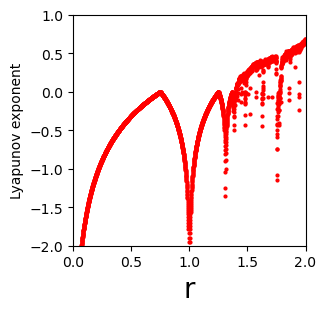

In [9]:
# set up the plot
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax.set_xlabel(r'r',fontsize=20)
ax.set_ylabel('Lyapunov exponent')
r_min=0.0  # range
r_max=2.0
x0=0.1    #initial condition
# this makes a plot of attracting points
#plt.axis([r_min, r_max,-2, 2.0])
#mkplot(r_min,r_max,x0,1000,ax)

# plots the lyapunov exponent
ax.set_xlim([r_min,r_max]) 
ax.set_ylim([-2, 1.0])
lyapunovrange(r_min,r_max,x0,3000,ax)
